In [1]:
# Dependencies
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
# Make results reproducible
seed = 1234
np.random.seed(seed)
tf.set_random_seed(seed)

In [3]:
# Loading the dataset
dataset = pd.read_csv('Iris_Dataset.csv')
dataset = pd.get_dummies(dataset, columns=['Species']) # One Hot Encoding
values = list(dataset.columns.values)

In [4]:
y = dataset[values[-3:]]
y = np.array(y, dtype='float32')
X = dataset[values[1:-3]]
X = np.array(X, dtype='float32')

In [5]:
# Shuffle Data
indices = np.random.choice(len(X), len(X), replace=False)
X_values = X[indices]
y_values = y[indices]

In [6]:
# Creating a Train and a Test Dataset
test_size = 10
X_test = X_values[-test_size:]
X_train = X_values[:-test_size]
y_test = y_values[-test_size:]
y_train = y_values[:-test_size]

In [7]:
# Session
sess = tf.Session()

# Interval / Epochs
interval = 50
epoch = 500

In [8]:
# Initialize placeholders
X_data = tf.placeholder(shape=[None, 4], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 3], dtype=tf.float32)

In [9]:
# Input neurons : 4
# Hidden neurons : 8
# Output neurons : 3
hidden_layer_nodes = 8

In [10]:
# Create variables for Neural Network layers
w1 = tf.Variable(tf.random_normal(shape=[4,hidden_layer_nodes])) # Inputs -> Hidden Layer
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))   # First Bias
w2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,3])) # Hidden layer -> Outputs
b2 = tf.Variable(tf.random_normal(shape=[3]))   # Second Bias


In [11]:
# Operations
hidden_output = tf.nn.relu(tf.add(tf.matmul(X_data, w1), b1))
final_output = tf.nn.softmax(tf.add(tf.matmul(hidden_output, w2), b2))

In [12]:
# Cost Function
loss = tf.reduce_mean(-tf.reduce_sum(y_target * tf.log(final_output), axis=0))

In [13]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [14]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [15]:
# Training
ls = {}
print('Training the model...')
for i in range(1, (epoch + 1)):
    sess.run(optimizer, feed_dict={X_data: X_train, y_target: y_train})
    if i % interval == 0:
        l = sess.run(loss, feed_dict={X_data: X_train, y_target: y_train})
        print('Epoch', i, '|', 'Loss:', l)
        ls[i] = l
        

Training the model...
Epoch 50 | Loss: 26.049301
Epoch 100 | Loss: 13.553825
Epoch 150 | Loss: 9.704758
Epoch 200 | Loss: 7.4781976
Epoch 250 | Loss: 6.327774
Epoch 300 | Loss: 5.5770926
Epoch 350 | Loss: 5.0523663
Epoch 400 | Loss: 4.6667256
Epoch 450 | Loss: 4.3580856
Epoch 500 | Loss: 4.0857043


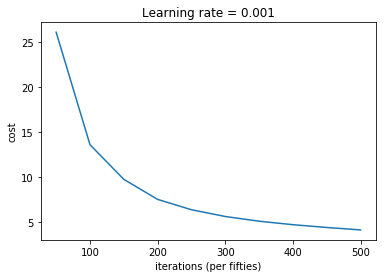

In [18]:
import matplotlib.pyplot as plt
iterations = list(ls.keys())
costs = list(ls.values())
plt.plot(iterations,costs)  
plt.ylabel('cost')
plt.xlabel('iterations (per fifties)')
plt.title("Learning rate = " + str(.001)) 
plt.show() 

In [17]:
# Prediction
for i in range(len(X_test)):
    print('Actual:', y_test[i], 'Predicted:', np.rint(sess.run(final_output, feed_dict={X_data: [X_test[i]]})))
    

Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
